In [1]:
import numpy as np

# global variables
BOARD_ROWS = 3
BOARD_COLS = 4
WIN_STATE = (0, 3)
LOSE_STATE = (1, 3)
START = (2, 0)
DETERMINISTIC = True


class State:
    def __init__(self, state=START):
        self.board = np.zeros([BOARD_ROWS, BOARD_COLS])
        self.board[1, 1] = -1
        self.state = state
        self.isEnd = False
        self.determine = DETERMINISTIC

    def giveReward(self):
        if self.state == WIN_STATE:
            return 1
        elif self.state == LOSE_STATE:
            return -1
        else:
            return 0

    def isEndFunc(self):
        if (self.state == WIN_STATE) or (self.state == LOSE_STATE):
            self.isEnd = True

    def nxtPosition(self, action):
        """
        action: up, down, left, right
        -------------
        0 | 1 | 2| 3|
        1 |
        2 |
        return next position
        """
        if self.determine:
            if action == "up":
                nxtState = (self.state[0] - 1, self.state[1])
            elif action == "down":
                nxtState = (self.state[0] + 1, self.state[1])
            elif action == "left":
                nxtState = (self.state[0], self.state[1] - 1)
            else:
                nxtState = (self.state[0], self.state[1] + 1)
            # if next state legal
            if (nxtState[0] >= 0) and (nxtState[0] <= (BOARD_ROWS -1)):
                if (nxtState[1] >= 0) and (nxtState[1] <= (BOARD_COLS -1)):
                    if nxtState != (1, 1):
                        return nxtState
            return self.state

    def showBoard(self):
        self.board[self.state] = 1
        for i in range(0, BOARD_ROWS):
            print('-----------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                if self.board[i, j] == 1:
                    token = '*'
                if self.board[i, j] == -1:
                    token = 'z'
                if self.board[i, j] == 0:
                    token = '0'
                out += token + ' | '
            print(out)
        print('-----------------')


# Agent of player

class Agent:

    def __init__(self):
        self.states = []
        self.actions = ["up", "down", "left", "right"]
        self.State = State()
        self.lr = 0.2
        self.exp_rate = 0.3

        # initial state reward
        self.state_values = {}
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                self.state_values[(i, j)] = 0  # set initial value to 0

    def chooseAction(self):
        # choose action with most expected value
        mx_nxt_reward = 0
        action = ""

        if np.random.uniform(0, 1) <= self.exp_rate:
            action = np.random.choice(self.actions)
        else:
            # greedy action
            for a in self.actions:
                # if the action is deterministic
                nxt_reward = self.state_values[self.State.nxtPosition(a)]
                if nxt_reward >= mx_nxt_reward:
                    action = a
                    mx_nxt_reward = nxt_reward
        return action

    def takeAction(self, action):
        position = self.State.nxtPosition(action)
        return State(state=position)

    def reset(self):
        self.states = []
        self.State = State()

    def play(self, rounds=10):
        i = 0
        while i < rounds:
            # to the end of game back propagate reward
            if self.State.isEnd:
                # back propagate
                reward = self.State.giveReward()
                # explicitly assign end state to reward values
                self.state_values[self.State.state] = reward  # this is optional
                print("Game End Reward", reward)
                for s in reversed(self.states):
                    reward = self.state_values[s] + self.lr * (reward - self.state_values[s])
                    self.state_values[s] = round(reward, 3)
                self.reset()
                i += 1
            else:
                action = self.chooseAction()
                # append trace
                self.states.append(self.State.nxtPosition(action))
                print("current position {} action {}".format(self.State.state, action))
                # by taking the action, it reaches the next state
                self.State = self.takeAction(action)
                # mark is end
                self.State.isEndFunc()
                print("nxt state", self.State.state)
                print("---------------------")

    def showValues(self):
        for i in range(0, BOARD_ROWS):
            print('----------------------------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                out += str(self.state_values[(i, j)]).ljust(6) + ' | '
            print(out)
        print('----------------------------------')


if __name__ == "__main__":
    ag = Agent()
    ag.play(50)
    print(ag.showValues())

current position (2, 0) action right
nxt state (2, 1)
---------------------
current position (2, 1) action left
nxt state (2, 0)
---------------------
current position (2, 0) action right
nxt state (2, 1)
---------------------
current position (2, 1) action right
nxt state (2, 2)
---------------------
current position (2, 2) action right
nxt state (2, 3)
---------------------
current position (2, 3) action right
nxt state (2, 3)
---------------------
current position (2, 3) action left
nxt state (2, 2)
---------------------
current position (2, 2) action right
nxt state (2, 3)
---------------------
current position (2, 3) action right
nxt state (2, 3)
---------------------
current position (2, 3) action right
nxt state (2, 3)
---------------------
current position (2, 3) action down
nxt state (2, 3)
---------------------
current position (2, 3) action right
nxt state (2, 3)
---------------------
current position (2, 3) action up
nxt state (1, 3)
---------------------
Game End Reward -1

In [2]:
import numpy as np

BOARD_ROWS = 3
BOARD_COLS = 4
WIN_STATE = (0, 3)
LOSE_STATE = (1, 3)
START = (2, 0)
DETERMINISTIC = False


class State:
    def __init__(self, state=START):
        self.board = np.zeros([BOARD_ROWS, BOARD_COLS])
        self.board[1, 1] = -1
        self.state = state
        self.isEnd = False
        self.determine = DETERMINISTIC

    def giveReward(self):
        if self.state == WIN_STATE:
            return 1
        elif self.state == LOSE_STATE:
            return -1
        else:
            return 

    def isEndFunc(self):
        if (self.state == WIN_STATE) or (self.state == LOSE_STATE):
            self.isEnd = True

    def _chooseActionProb(self, action):
        if action == "up":
            return np.random.choice(["up", "left", "right"], p=[0.8, 0.1, 0.1])
        if action == "down":
            return np.random.choice(["down", "left", "right"], p=[0.8, 0.1, 0.1])
        if action == "left":
            return np.random.choice(["left", "up", "down"], p=[0.8, 0.1, 0.1])
        if action == "right":
            return np.random.choice(["right", "up", "down"], p=[0.8, 0.1, 0.1])

    def nxtPosition(self, action):
        """
        action: up, down, left, right
        -------------
        0 | 1 | 2| 3|
        1 |
        2 |
        return next position on board
        """
        if self.determine:
            if action == "up":
                nxtState = (self.state[0] - 1, self.state[1])
            elif action == "down":
                nxtState = (self.state[0] + 1, self.state[1])
            elif action == "left":
                nxtState = (self.state[0], self.state[1] - 1)
            else:
                nxtState = (self.state[0], self.state[1] + 1)
            self.determine = False
        else:
            # non-deterministic
            action = self._chooseActionProb(action)
            self.determine = True
            nxtState = self.nxtPosition(action)

        # if next state is legal
        if (nxtState[0] >= 0) and (nxtState[0] <= 2):
            if (nxtState[1] >= 0) and (nxtState[1] <= 3):
                if nxtState != (1, 1):
                    return nxtState
        return self.state

    def showBoard(self):
        self.board[self.state] = 1
        for i in range(0, BOARD_ROWS):
            print('-----------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                if self.board[i, j] == 1:
                    token = '*'
                if self.board[i, j] == -1:
                    token = 'z'
                if self.board[i, j] == 0:
                    token = '0'
                out += token + ' | '
            print(out)
        print('-----------------')


class Agent:

    def __init__(self):
        self.states = []  # record position and action taken at the position
        self.actions = ["up", "down", "left", "right"]
        self.State = State()
        self.isEnd = self.State.isEnd
        self.lr = 0.2
        self.exp_rate = 0.3
        self.decay_gamma = 0.9

        # initial Q values
        self.Q_values = {}
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                self.Q_values[(i, j)] = {}
                for a in self.actions:
                    self.Q_values[(i, j)][a] = 0  # Q value is a dict of dict

    def chooseAction(self):
        # choose action with most expected value
        mx_nxt_reward = 0
        action = ""

        if np.random.uniform(0, 1) <= self.exp_rate:
            action = np.random.choice(self.actions)
        else:
            # greedy action
            for a in self.actions:
                current_position = self.State.state
                nxt_reward = self.Q_values[current_position][a]
                if nxt_reward >= mx_nxt_reward:
                    action = a
                    mx_nxt_reward = nxt_reward
            # print("current pos: {}, greedy aciton: {}".format(self.State.state, action))
        return action

    def takeAction(self, action):
        position = self.State.nxtPosition(action)
        # update State
        return State(state=position)

    def reset(self):
        self.states = []
        self.State = State()
        self.isEnd = self.State.isEnd

    def play(self, rounds=10):
        i = 0
        while i < rounds:
            # to the end of game back propagate reward
            if self.State.isEnd:
                # back propagate
                reward = self.State.giveReward()
                for a in self.actions:
                    self.Q_values[self.State.state][a] = reward
                print("Game End Reward", reward)
                for s in reversed(self.states):
                    current_q_value = self.Q_values[s[0]][s[1]]
                    reward = current_q_value + self.lr * (self.decay_gamma * reward - current_q_value)
                    self.Q_values[s[0]][s[1]] = round(reward, 3)
                self.reset()
                i += 1
            else:
                action = self.chooseAction()
                # append trace
                self.states.append([(self.State.state), action])
                print("current position {} action {}".format(self.State.state, action))
                # by taking the action, it reaches the next state
                self.State = self.takeAction(action)
                # mark is end
                self.State.isEndFunc()
                print("nxt state", self.State.state)
                print("---------------------")
                self.isEnd = self.State.isEnd


if __name__ == "__main__":
    ag = Agent()
    print("initial Q-values ... \n")
    print(ag.Q_values)

    ag.play(50)
    print("latest Q-values ... \n")
    print(ag.Q_values)

initial Q-values ... 

{(0, 0): {'up': 0, 'down': 0, 'left': 0, 'right': 0}, (0, 1): {'up': 0, 'down': 0, 'left': 0, 'right': 0}, (0, 2): {'up': 0, 'down': 0, 'left': 0, 'right': 0}, (0, 3): {'up': 0, 'down': 0, 'left': 0, 'right': 0}, (1, 0): {'up': 0, 'down': 0, 'left': 0, 'right': 0}, (1, 1): {'up': 0, 'down': 0, 'left': 0, 'right': 0}, (1, 2): {'up': 0, 'down': 0, 'left': 0, 'right': 0}, (1, 3): {'up': 0, 'down': 0, 'left': 0, 'right': 0}, (2, 0): {'up': 0, 'down': 0, 'left': 0, 'right': 0}, (2, 1): {'up': 0, 'down': 0, 'left': 0, 'right': 0}, (2, 2): {'up': 0, 'down': 0, 'left': 0, 'right': 0}, (2, 3): {'up': 0, 'down': 0, 'left': 0, 'right': 0}}
current position (2, 0) action right
nxt state (2, 1)
---------------------
current position (2, 1) action right
nxt state (2, 2)
---------------------
current position (2, 2) action down
nxt state (2, 2)
---------------------
current position (2, 2) action up
nxt state (1, 2)
---------------------
current position (1, 2) action right
nxt

In [6]:
import numpy as np

def return_state_utility(v, T, u, reward, gamma):
    action_array = np.zeros(4)
    for action in range(0, 4):
        action_array[action] = np.sum(np.multiply(u, np.dot(v, T[:,:,action])))
    return reward + gamma * np.max(action_array)

def main():

    #Change as you want
    state = 8 #it corresponds to (1,1) in the robot world
    #Assuming that the discount factor is equal to 1.0
    gamma = 1.0

    #Starting state vector
    #The agent starts from (1, 1)
    v = np.zeros(12)
    v[state] = 1.0

    print(v)
    T = np.load("T.npy")

    #Utility vector
    u = np.array([[0.812, 0.868, 0.918,   1.0,
                   0.762,   0.0, 0.660,  -1.0,
                   0.705, 0.655, 0.611, 0.388]])

    #Reward vector
    r = np.array([-0.04, -0.04, -0.04,  +1.0,
                  -0.04,   0.0, -0.04,  -1.0,
                  -0.04, -0.04, -0.04, -0.04]) 

    #Use the Beelman equation to find the utility of state (1,1)
    utility = return_state_utility(v, T, u, r[state], gamma)
    print("Utility of the state: " + str(utility))

if __name__ == "__main__":
    main()

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Utility of the state: 0.7056


In [3]:
import numpy as np

def return_policy_evaluation(p, u, r, T, gamma):
    for s in range(12):
        if not np.isnan(p[s]):
            v = np.zeros((1,12))
            v[0,s] = 1.0
            action = int(p[s])
            u[s] = r[s] + gamma * np.sum(np.multiply(u, np.dot(v, T[:,:,action])))
    return u

def return_policy_evaluation_linalg(p, r, T, gamma):
    u = np.zeros(12)
    for s in range(12):
        if not np.isnan(p[s]):
            action = int(p[s])
            u[s] = np.linalg.solve(np.identity(12) - gamma*T[:,:,action], r)[s]
    return u

def return_expected_action(u, T, v):
    """Return the expected action.
    It returns an action based on the
    expected utility of doing a in state s, 
    according to T and u. This action is
    the one that maximize the expected
    utility.
    @param u utility vector
    @param T transition matrix
    @param v starting vector
    @return expected action (int)
    """
    actions_array = np.zeros(4)
    for action in range(4):
         #Expected utility of doing a in state s, according to T and u.
         actions_array[action] = np.sum(np.multiply(u, np.dot(v, T[:,:,action])))
    return np.argmax(actions_array)

def print_policy(p, shape):
    """Print the policy on the terminal
    Using the symbol:
    * Terminal state
    ^ Up
    > Right
    v Down
    < Left
    # Obstacle
    """
    counter = 0
    policy_string = ""
    for row in range(shape[0]):
        for col in range(shape[1]):
            if(p[counter] == -1): policy_string += " *  "            
            elif(p[counter] == 0): policy_string += " ^  "
            elif(p[counter] == 1): policy_string += " <  "
            elif(p[counter] == 2): policy_string += " v  "           
            elif(p[counter] == 3): policy_string += " >  "
            elif(np.isnan(p[counter])): policy_string += " #  "
            counter += 1
        policy_string += '\n'
    print(policy_string)


def main_iterative():
    """Finding the solution using the iterative approach
    """
    gamma = 0.999
    iteration = 0
    T = np.load("T.npy")

    #Generate the first policy randomly
    # Nan=Nothing, -1=Terminal, 0=Up, 1=Left, 2=Down, 3=Right
    p = np.random.randint(0, 4, size=(12)).astype(np.float32)
    p[5] = np.NaN
    p[3] = p[7] = -1

    #Utility vectors
    u = np.array([0.0, 0.0, 0.0,  0.0,
                   0.0, 0.0, 0.0,  0.0,
                   0.0, 0.0, 0.0,  0.0])

    #Reward vector
    r = np.array([-0.04, -0.04, -0.04,  +1.0,
                  -0.04,   0.0, -0.04,  -1.0,
                  -0.04, -0.04, -0.04, -0.04])

    while True:
        iteration += 1
        epsilon = 0.0001
        #1- Policy evaluation
        u1 = u.copy()
        u = return_policy_evaluation(p, u, r, T, gamma)
        #Stopping criteria
        delta = np.absolute(u - u1).max()
        if delta < epsilon * (1 - gamma) / gamma: break
        for s in range(12):
            if not np.isnan(p[s]) and not p[s]==-1:
                v = np.zeros((1,12))
                v[0,s] = 1.0
                #2- Policy improvement
                a = return_expected_action(u, T, v)         
                if a != p[s]: p[s] = a
        print_policy(p, shape=(3,4))

    print("=================== FINAL RESULT ==================")
    print("Iterations: " + str(iteration))
    print("Delta: " + str(delta))
    print("Gamma: " + str(gamma))
    print("Epsilon: " + str(epsilon))
    print("===================================================")
    print(u[0:4])
    print(u[4:8])
    print(u[8:12])
    print("===================================================")
    print_policy(p, shape=(3,4))
    print("===================================================")


def main_linalg():
    """Finding the solution using a linear algebra approach
    """
    gamma = 0.999
    iteration = 0
    T = np.load("T.npy")

    #Generate the first policy randomly
    # Nan=Nothing, -1=Terminal, 0=Up, 1=Left, 2=Down, 3=Right
    p = np.random.randint(0, 4, size=(12)).astype(np.float32)
    p[5] = np.NaN
    p[3] = p[7] = -1

    #Utility vectors
    u = np.array([0.0, 0.0, 0.0,  0.0,
                   0.0, 0.0, 0.0,  0.0,
                   0.0, 0.0, 0.0,  0.0])

    #Reward vector
    r = np.array([0.02, 0.02, 0.02,  +1.0,
                  0.02,   0.0, 0.02,  -1.0,
                  0.02, 0.02, 0.02, 0.02])

    while True:
        iteration += 1
        epsilon = 0.0001
        #1- Policy evaluation
        #u1 = u.copy()
        u = return_policy_evaluation_linalg(p, r, T, gamma)
        #Stopping criteria
        #delta = np.absolute(u - u1).max()
        #if (delta < epsilon * (1 - gamma) / gamma) or iteration > 100: break
        unchanged = True
        for s in range(12):
            if not np.isnan(p[s]) and not p[s]==-1:
                v = np.zeros((1,12))
                v[0,s] = 1.0
                #2- Policy improvement
                a = return_expected_action(u, T, v)         
                if a != p[s]: 
                    p[s] = a
                    unchanged = False
        print_policy(p, shape=(3,4))

        if unchanged: break

    print("=================== FINAL RESULT ==================")
    print("Iterations: " + str(iteration))
    #print("Delta: " + str(delta))
    print("Gamma: " + str(gamma))
    print("Epsilon: " + str(epsilon))
    print("===================================================")
    print(u[0:4])
    print(u[4:8])
    print(u[8:12])
    print("===================================================")
    print_policy(p, shape=(3,4))
    print("===================================================")




def main():

    # main_iterative()
    main_linalg()


if __name__ == "__main__":
    main()

 <   <   <   *  
 ^   #   ^   *  
 >   ^   <   v  

 ^   >   <   *  
 ^   #   v   *  
 ^   >   v   v  

 <   >   ^   *  
 <   #   <   *  
 <   >   >   v  

 <   <   v   *  
 v   #   <   *  
 <   <   ^   v  

 v   <   <   *  
 <   #   <   *  
 ^   <   ^   v  

 v   >   <   *  
 ^   #   <   *  
 >   ^   ^   v  

 <   >   v   *  
 ^   #   <   *  
 ^   ^   ^   v  

 <   <   v   *  
 ^   #   <   *  
 <   <   ^   v  

 ^   <   <   *  
 v   #   <   *  
 v   <   ^   v  

 v   >   <   *  
 v   #   <   *  
 <   <   ^   v  

 <   >   v   *  
 v   #   <   *  
 ^   <   ^   v  

 <   <   v   *  
 ^   #   <   *  
 ^   ^   ^   v  

 ^   <   <   *  
 ^   #   <   *  
 <   <   ^   v  

 >   >   <   *  
 v   #   <   *  
 v   <   ^   v  

 v   >   v   *  
 v   #   <   *  
 <   <   ^   v  

 <   <   v   *  
 v   #   <   *  
 ^   <   ^   v  

 v   <   <   *  
 ^   #   <   *  
 ^   ^   ^   v  

 ^   >   <   *  
 ^   #   <   *  
 <   <   ^   v  

 <   >   v   *  
 v   #   <   *  
 v   <   ^   v  

 <   <   v  

KeyboardInterrupt: 

=================== FINAL RESULT ==================
Iterations: 9199
Delta: 1.0009197666249747e-05
Gamma: 0.999
Epsilon: 0.01
[99.9899908 99.9899908 99.9899908  1.       ]
[99.9899908  0.        99.9899908 -1.       ]
[99.9899908 99.9899908 99.9899908 99.9899908]


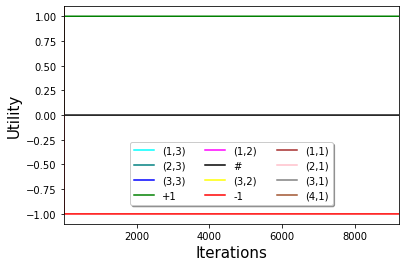

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

def return_state_utility(v, T, u, reward, gamma):
    """Return the utility of a single state.
    This is an implementation of the Bellman equation.
    """
    action_array = np.zeros(4)
    for action in range(0, 4):
        action_array[action] = np.sum(np.multiply(u, np.dot(v, T[:,:,action])))
    return reward + gamma * np.max(action_array)

def generate_graph(utility_list):
    """Given a list of utility arrays (one for each iteration)
       it generates a matplotlib graph and save it as 'output.jpg'
    """
    name_list = ('(1,3)', '(2,3)', '(3,3)', '+1', '(1,2)', '#', '(3,2)', '-1', '(1,1)', '(2,1)', '(3,1)', '(4,1)')
    color_list = ('cyan', 'teal', 'blue', 'green', 'magenta', 'black', 'yellow', 'red', 'brown', 'pink', 'gray', 'sienna')
    counter = 0
    index_vector = np.arange(len(utility_list))
    for state in range(12):
        state_list = list()
        for utility_array in utility_list:
             state_list.append(utility_array[state])
        plt.plot(index_vector, state_list, color=color_list[state], label=name_list[state])  
        counter += 1
    #Adjust the legend and the axis
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.4), ncol=3, fancybox=True, shadow=True)
    plt.ylim((-1.1, +1.1))
    plt.xlim((1, len(utility_list)-1))
    plt.ylabel('Utility', fontsize=15)
    plt.xlabel('Iterations', fontsize=15)
    plt.savefig("./output.jpg", dpi=500)

def main():
    #Change as you want
    tot_states = 12
    gamma = 0.999 #Discount factor
    iteration = 0 #Iteration counter
    epsilon = 0.01 #Stopping criteria small value

    #List containing the data for each iteation
    graph_list = list()

    #Transition matrix loaded from file (It is too big to write here)
    T = np.load("T.npy")

    #Reward vector
    r = np.array([0.1, 0.1, 0.1,  +1.0,
                  0.1,   0.0, 0.1,  -1.0,
                  0.1, 0.1, 0.1, 0.1])    

    #Utility vectors
    u = np.array([0.0, 0.0, 0.0,  0.0,
                   0.0, 0.0, 0.0,  0.0,
                   0.0, 0.0, 0.0,  0.0])
    u1 = np.array([0.0, 0.0, 0.0,  0.0,
                    0.0, 0.0, 0.0,  0.0,
                    0.0, 0.0, 0.0,  0.0])

    while True:
        delta = 0
        u = u1.copy()
        iteration += 1
        graph_list.append(u)
        for s in range(tot_states):
            reward = r[s]
            v = np.zeros((1,tot_states))
            v[0,s] = 1.0
            u1[s] = return_state_utility(v, T, u, reward, gamma)
            delta = max(delta, np.abs(u1[s] - u[s]))
        #Stopping criteria
        if delta < epsilon * (1 - gamma) / gamma:
                print("=================== FINAL RESULT ==================")
                print("Iterations: " + str(iteration))
                print("Delta: " + str(delta))
                print("Gamma: " + str(gamma))
                print("Epsilon: " + str(epsilon))
                print("===================================================")
                print(u[0:4])
                print(u[4:8])
                print(u[8:12])
                print("===================================================")
                break

    generate_graph(graph_list)

if __name__ == "__main__":
    main()